In [ ]:
# TODO:
# starting from first model, try to register other models sequentially as follows:
# - align GPS positions by transforming both models into ECEF frame
# - find pairs of spatially adjacent keyframes in both models
# - find matches between those pairs of frames
# - find rigid transformation which maps the second model into the cooridnate frame of the first model
# - validate correctness based on heuristics (see Strecha_2010.pdf)
# - continue with next model

# finally:
# bundle adjust composite model

In [12]:
import sys
import os
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")

from mapper.geometry import from_twist, transform_to_gps_frame
from mapper.gps import gps_to_ltp, interpolate_gps

In [2]:
gps_file = "../data_processing/splitted/gps/gps.json"
gps_ = json.load(open(gps_file, "r"))
gps = np.zeros((len(gps_), 3))
gps[:, 0:2] = np.array(gps_)
gps, _ = gps_to_ltp(gps)
gps = interpolate_gps(gps)

Origin of local tangent plane: lat: 49.32741555555556 deg -- long: 10.519741944444446 deg -- height: 0.0 m


In [5]:
# load first model
pose_graph_0 = pickle.load(open("pose_graph_cluster_000001.pkl", "rb"))
map_points_0 = pickle.load(open("map_points_cluster_000001.pkl", "rb"))

_ = transform_to_gps_frame(pose_graph_0, map_points_0, gps)

similarity transform map -> GPS frame: 1.4438141579585926, [ 0.3577161  -0.00149537 -0.05267162], [[ 0.99942181  0.03263341  0.00954529]
 [-0.0033342  -0.18532006  0.98267256]
 [ 0.03383689 -0.98213621 -0.1851041 ]]
pts_3d.mean:  [-29.91451788  12.39965382  -3.22876652]


In [6]:
# load second model
pose_graph_1 = pickle.load(open("pose_graph_cluster_000002.pkl", "rb"))
map_points_1 = pickle.load(open("map_points_cluster_000002.pkl", "rb"))

_ = transform_to_gps_frame(pose_graph_1, map_points_1, gps)

similarity transform map -> GPS frame: 0.8959923479577812, [-65.50652708 -10.23179974  -0.30995525], [[ 0.99019348  0.01633315  0.13874474]
 [-0.13645021 -0.09998559  0.98558826]
 [ 0.02997024 -0.99485482 -0.09677642]]
pts_3d.mean:  [-20.21878596   4.69482401  -0.6799309 ]


In [23]:
pos_0 = np.array([from_twist(pose_graph_0.nodes[n]["pose"])[1] for n in pose_graph_0])
pos_1 = np.array([from_twist(pose_graph_1.nodes[n]["pose"])[1] for n in pose_graph_1])

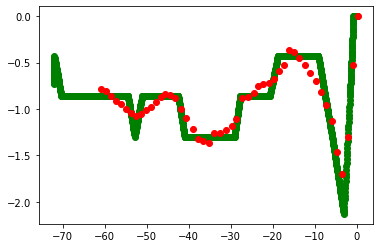

In [22]:
plt.scatter(gps[:1500, 0], gps[:1500, 1], c="g")
plt.scatter(pos_0[:, 0], pos_0[:, 1], c="r")

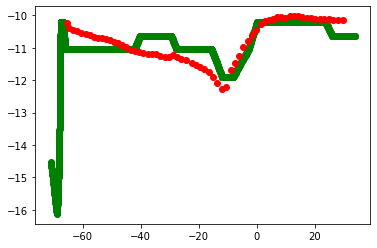

In [32]:
plt.scatter(gps[1800:3600, 0], gps[1800:3600, 1], c="g")
plt.scatter(pos_1[:, 0], pos_1[:, 1], c="r")

In [ ]:
# obtain spatially adjacent frames


In [ ]:
# once we know which 3D points correspond to another, we can obtain a rigid transformation (rotation only) for the second model which best aligns the points